          Close
0    131.134995
1    134.047501
2    126.144997
3    133.440002
4    132.767502
..          ...
498  152.059998
499  141.210007
500  140.360001
501  146.029999
502  146.139999

[503 rows x 1 columns]


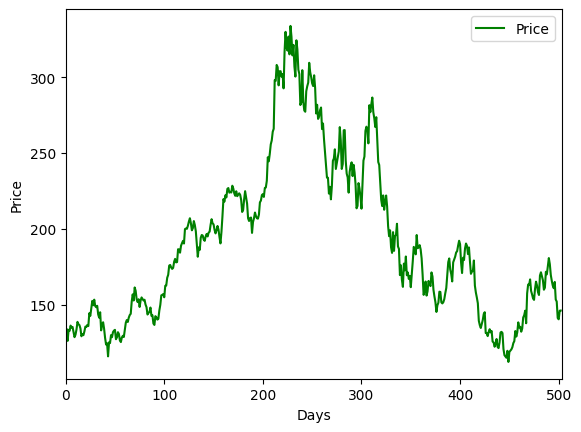

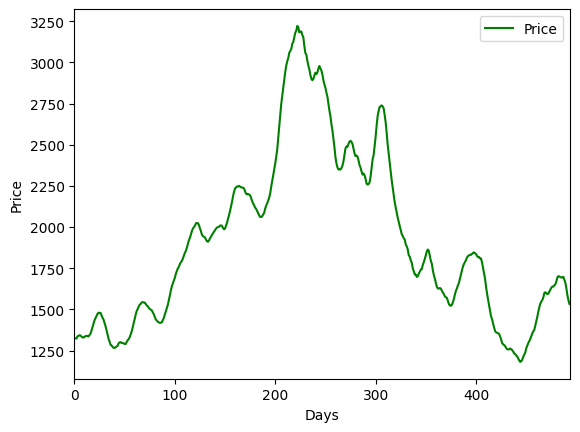

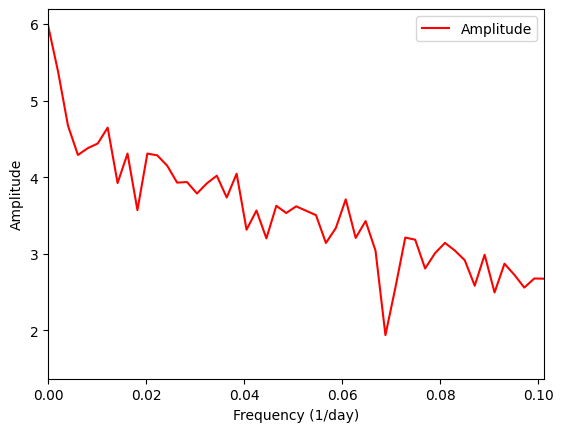

In [3]:
# -*- coding: utf-8 -*-
"""FFTStock.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1SMAEigXrkwOKsWRZshQ8TdQVhJCEcwMH

Baisc imports:
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

"""Download Nvidia chart:"""

df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/NVDA?period1=1609459200&period2=1672444800&interval=1d&events=history&includeAdjustedClose=true', sep=',', usecols=['Close'])
print(df)

"""Draw rate:"""

n = df.size
f = df.iloc[:,:].values.transpose()[0]
plt.plot(np.arange(n), f, color='green',label='Price')
plt.xlim(0, n)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

"""Smooth curve:"""

kernel = np.ones(10)
f = np.convolve(f, kernel, mode='valid')
n = len(f)
plt.plot(np.arange(n), f, color='green', label='Price')
plt.xlim(0, n)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

"""Compute the FFT algo:"""

fourier = np.log10(np.fft.fft(f,n)[range(int(n/2))])
freq = np.arange(int(n / 2))/n
plt.plot(freq, abs(fourier), color='red', label='Amplitude')
plt.xlabel('Frequency (1/day)')
plt.ylabel('Amplitude')
# focus on specific range
plt.xlim(freq[0],freq[50])
plt.legend()
plt.show()
